In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as sk

th1 = 1.7  #@param {type:"slider", min:0, max:10, step:0.1}
th2 = 2.2  #@param {type:"slider", min:0, max:10, step:0.1}
th3 = 1.2  #@param {type:"slider", min:0, max:10, step:0.1}
th4 = 0.4  #@param {type:"slider", min:0, max:10, step:0.1}

def dist():  # データの分布
    x1 = np.random.normal(0, 1.414)  # normal -> ガウス分布
    x2 = np.random.laplace(0, 1)  # laplace -> ラプラス分布
    return x1, x2

def truey(x1, x2):  # 真の識別関数
    if th1 * x1**2 + th2 * x1 * x2 - th3 * x2**2 < th4:return 1
    else:return -1

def generate(N):  # N個のサンプルを生成
    X = np.zeros((N, 2))
    y = np.zeros(N, dtype=int)
    for i in range(N):
        x1, x2 = dist()
        y[i] = truey(x1, x2)
        X[i, 0] = x1
        X[i, 1] = x2
    return X, y

def generalization_error(f, M):  # f の汎化誤差をM個のサンプルで近似
    correct = 0
    for i in range(M):
        x1, x2 = dist()
        y = f([[x1, x2]])
        if truey(x1, x2) == 1 and y == 1:
            correct = correct + 1
        elif truey(x1, x2) == -1 and y == -1:
            correct = correct + 1
    return 1 - 1.0 * correct / M

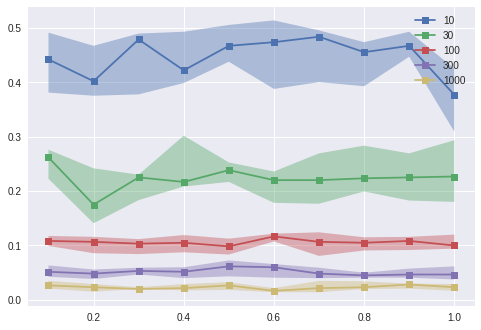

In [38]:
num_trials=10

learners = [10, 30, 100, 300, 1000]
#labels = ['method1', 'method2', 'method3']
#colors = ['olive', 'indigo', 'tomato']
lambda_values = [(i+1)/10 for i in range(10)]#[ 2 ** -i for i in range(7) ] 
results = np.zeros((len(learners),len(lambda_values), num_trials))


## resultsに結果を格納する

for i in range(len(learners)):
  for j in range(len(lambda_values)):
    for k in range(num_trials):
      X,y = generate(learners[i])
      svm= SVC(kernel='rbf', gamma=lambda_values[i], C=1.0)
      svm.fit(X,y)
      results[i][j][k] = generalization_error(svm.predict, 300)

      
      
## ガンマによる違い
for i in range(len(learners)):
  median = np.median(results[i], axis=1)
  upper =  np.percentile(results[i], 75, axis=1)
  lower =  np.percentile(results[i], 25, axis=1)
  plt.fill_between(lambda_values, upper, lower, alpha=0.4)
  plt.plot(lambda_values, median, label=str(learners[i]), marker='s')
plt.legend(loc='upper right')

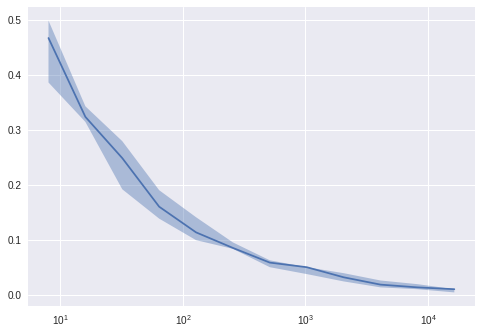

In [39]:
num_trials=10

learners = [(2)**i for i in range(3,15)]
results = []

for i in range(len(learners)):
  r = []
  for j in range(num_trials):
    X,y = generate(learners[i])
    svm= SVC(kernel='rbf', gamma=0.2, C=1.0)
    svm.fit(X,y)
    r.append(generalization_error(svm.predict, 300))
  results.append(r)

## 
medians = [np.median(r) for r in results]
uppers = [np.percentile(r, 75) for r in results]
lowers = [np.percentile(r, 25) for r in results]
plt.fill_between(learners, uppers, lowers, alpha=0.4)
plt.semilogx(learners, medians)

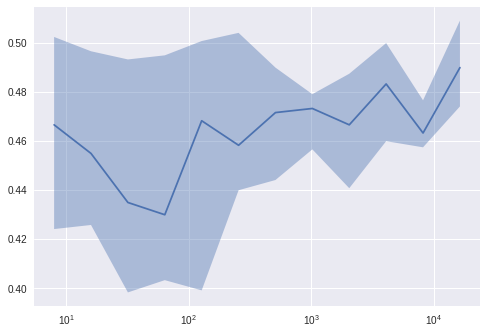

In [44]:
from sklearn.svm import SVC
num_trials=10

learners = [(2)**i for i in range(3,15)]
results = []

for i in range(len(learners)):
  r = []
  for j in range(num_trials):
    X,y = generate(learners[i])
    svm= SVC(kernel='linear')
    svm.fit(X,y)
    r.append(generalization_error(svm.predict, 300))
  results.append(r)

## 
medians = [np.median(r) for r in results]
uppers = [np.percentile(r, 75) for r in results]
lowers = [np.percentile(r, 25) for r in results]
plt.fill_between(learners, uppers, lowers, alpha=0.4)
plt.semilogx(learners, medians)